Contour Detection

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
img = cv2.imread('internal_external.png')

In [3]:
img.shape

(424, 704, 3)

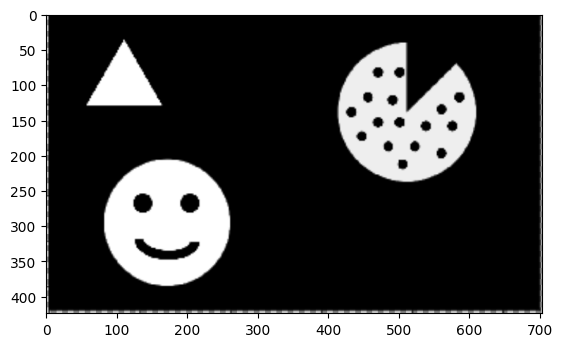

In [4]:
plt.imshow(img, cmap='gray')

Find Contours
- cv2.RETR_EXTERNAL : only extract contours 
- cv2.RETR_CCOMP : Extract both internal and extarnal contours organized in a two-level hierarchy.
- cv2.RETR_TREE : Extract both internal and external contour organized in a tree graph.
- cv2.RETR_LIST : Extract all contours without any internal and external relationship.

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
type(contours)

tuple

In [7]:
len(contours)

23

In [8]:
type(hierarchy)

numpy.ndarray

In [9]:
hierarchy.shape

(1, 23, 4)

In [10]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [22,  4, -1, -1],
        [-1, 21, -1, -1]]], dtype=int32)

In [13]:
# Draw External Contors 
# Set up empty array 
external_contours = np.zeros(img.shape)

# For every entry in contours 
for i in range(len(contours)):
    # last columns in the array is -1 if an external contour(no contors inside of it)
    if hierarchy[0][i][3] == -1:
        # We can now draw the external contours from the list of contours 
        cv2.drawContours(external_contours, contours, i, 255, -1)

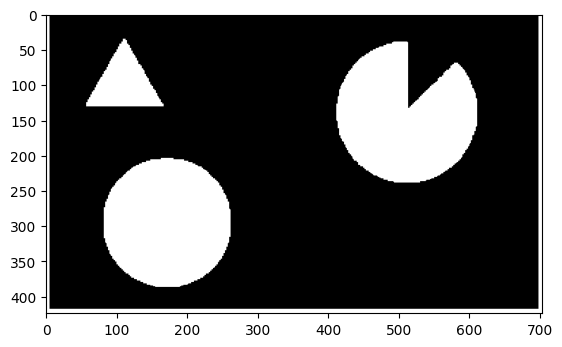

In [15]:
plt.imshow(external_contours, cmap='gray')

In [19]:
# Create empty array to hold internal contours 
image_internal = np.zeros(img.shape)

#Internal though list of contours array 
for i in range(len(contours)):
        # If third column value is NOT equal to -1 than its internal '
        if hierarchy[0][i][3] != -1:
                # Draw the Contours 
                cv2.drawContours(image_internal, contours, i, 255, -1)

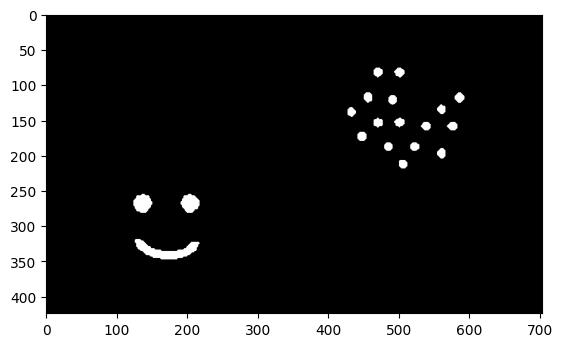

In [20]:
plt.imshow(image_internal, cmap='gray')

In [21]:
# Done